In [1]:
from commstools import Signal
from commstools.impairments import apply_awgn, apply_pmd
import numpy as np


2026-02-20 18:29:45 [INFO] [commstools/backend.py] CuPy is available and functional, defaulting Signals to GPU.


In [2]:
NUM_SYMBOLS = 2**18
SYMBOL_RATE = 1e9
SPS = 2
MOD = "PSK"
ORDER = 4
ESN0_DB = 20
DGD_SYMBOLS = 0.0
THETA = np.pi / 4


,Property,Value
0,Spectral Domain,BASEBAND
1,Physical Domain,DIG
2,Modulation (Scheme/Order),PSK / 4
3,Symbol Rate,1.00 GBaud
4,Bit Rate,2.00 Gbps
5,Sampling Rate,2.00 GHz
6,Samples Per Symbol,2.00
7,Pulse Shape,RRC
8,Duration,262.14 µs
9,Center Frequency,0.00 Hz


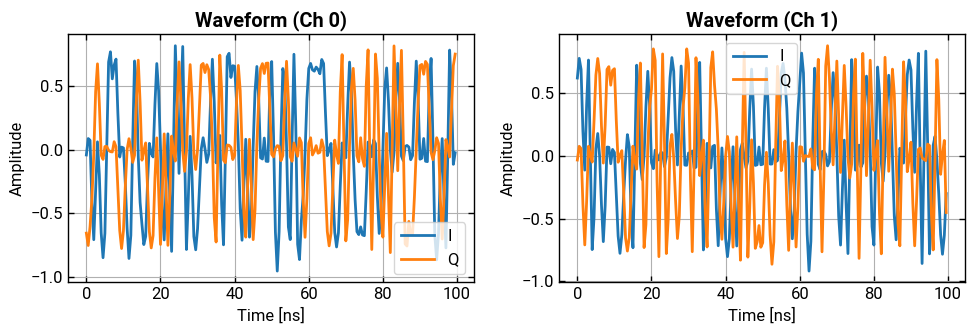

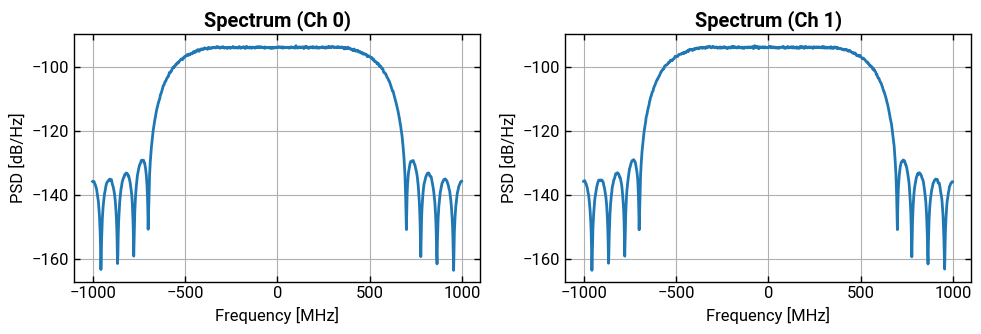

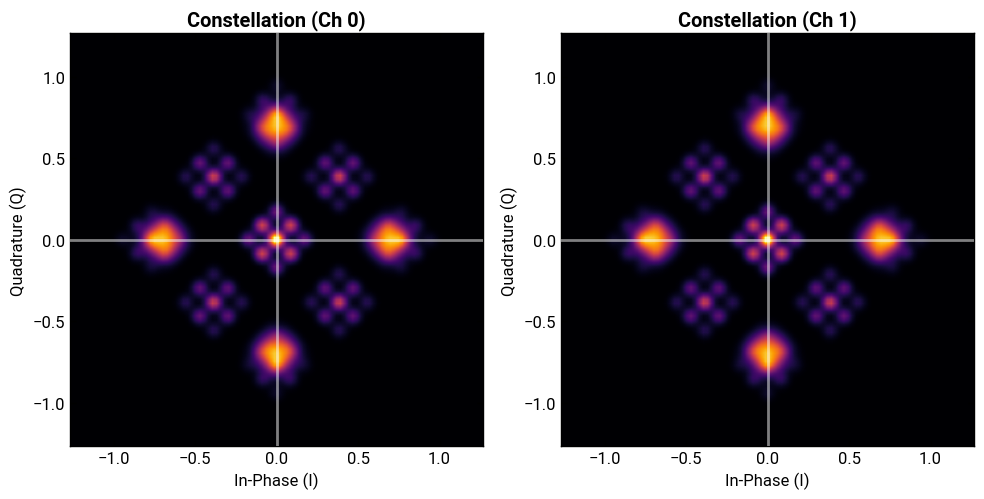

In [3]:
sig = Signal.psk(
    num_symbols=NUM_SYMBOLS,
    sps=SPS,
    symbol_rate=SYMBOL_RATE,
    order=ORDER,
    num_streams=2,
    seed=42,
)
sig.print_info()
sig.plot_symbols(num_symbols=100, show=True)
sig.plot_psd(show=True, nperseg=2**10)
sig.plot_constellation(show=True)


,Property,Value
0,Spectral Domain,BASEBAND
1,Physical Domain,DIG
2,Modulation (Scheme/Order),PSK / 4
3,Symbol Rate,1.00 GBaud
4,Bit Rate,2.00 Gbps
5,Sampling Rate,2.00 GHz
6,Samples Per Symbol,2.00
7,Pulse Shape,RRC
8,Duration,262.14 µs
9,Center Frequency,0.00 Hz


2026-02-20 18:29:47 [INFO] [commstools/impairments.py] Adding AWGN (Es/N0 target: 20.00 dB).


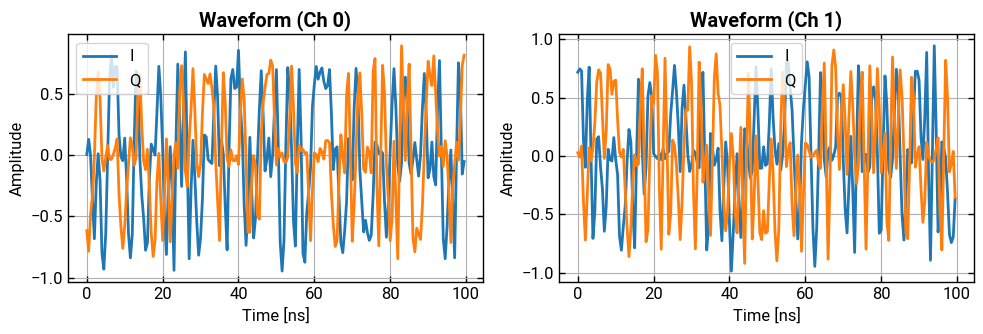

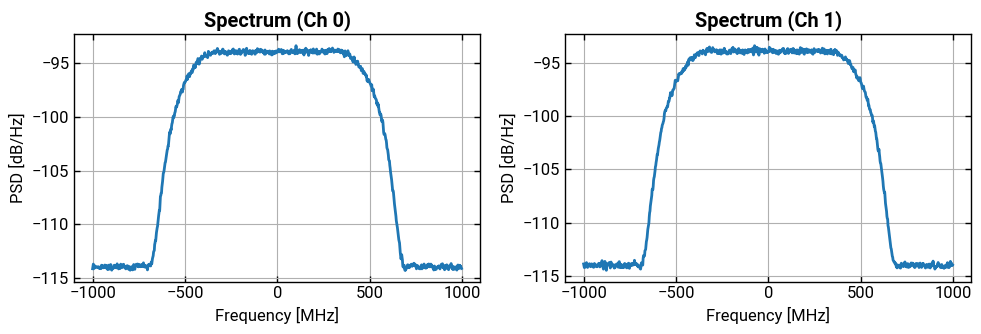

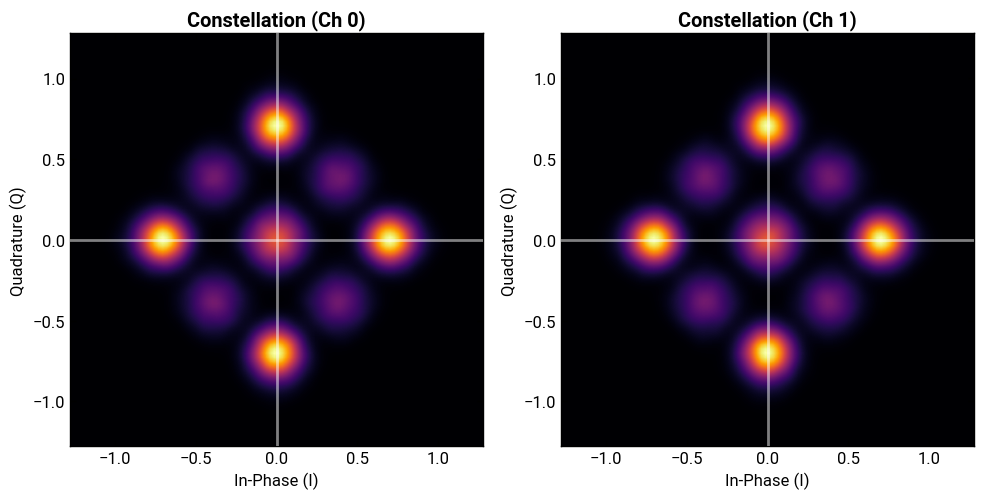

In [4]:
sig_dist = sig.copy()

sig_dist.print_info()
sig_dist = apply_awgn(sig_dist, esn0_db=ESN0_DB)
sig_dist.plot_symbols(num_symbols=100, show=True)
sig_dist.plot_psd(show=True, nperseg=2**10)
sig_dist.plot_constellation(show=True)


2026-02-20 18:29:47 [INFO] [commstools/impairments.py] Applying PMD (DGD=0.00e+00 s, theta=0.785 rad).


,Property,Value
0,Spectral Domain,BASEBAND
1,Physical Domain,DIG
2,Modulation (Scheme/Order),PSK / 4
3,Symbol Rate,1.00 GBaud
4,Bit Rate,2.00 Gbps
5,Sampling Rate,2.00 GHz
6,Samples Per Symbol,2.00
7,Pulse Shape,RRC
8,Duration,262.14 µs
9,Center Frequency,0.00 Hz


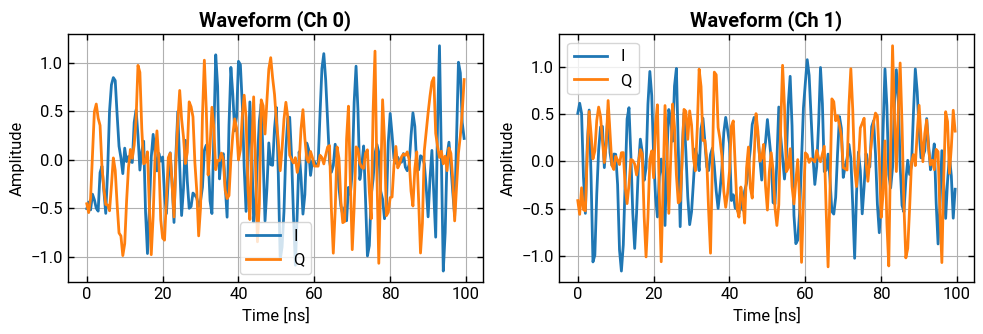

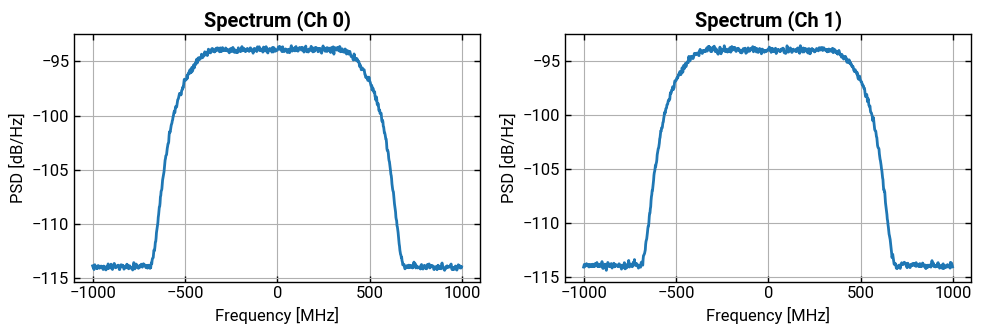

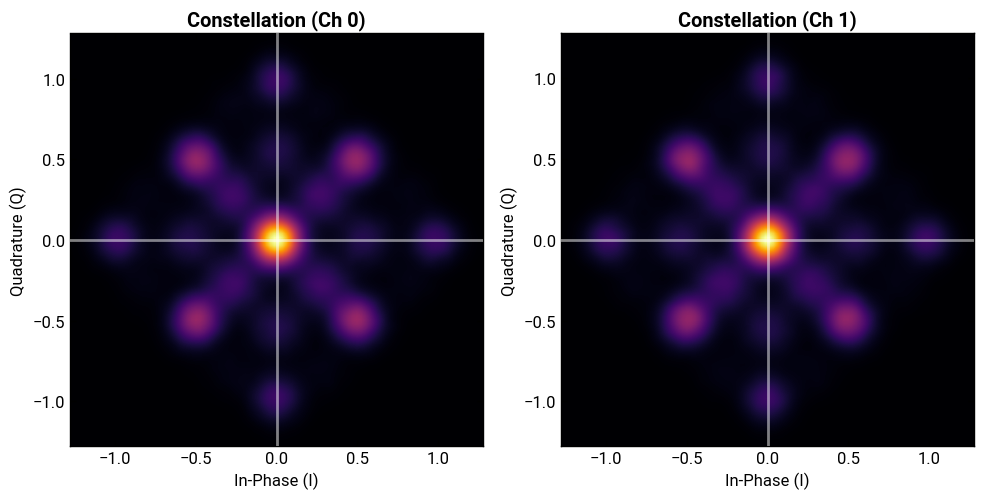

In [5]:
sig_dist = apply_pmd(sig_dist, dgd=DGD_SYMBOLS / SYMBOL_RATE, theta=THETA)

sig_dist.print_info()
sig_dist.plot_symbols(num_symbols=100, show=True)
sig_dist.plot_psd(show=True, nperseg=2**10)
sig_dist.plot_constellation(show=True)


2026-02-20 18:31:23 [INFO] [commstools/core.py] Generating shaping filter taps (shape: rrc).


,Property,Value
0,Spectral Domain,BASEBAND
1,Physical Domain,DIG
2,Modulation (Scheme/Order),PSK / 4
3,Symbol Rate,1.00 GBaud
4,Bit Rate,2.00 Gbps
5,Sampling Rate,2.00 GHz
6,Samples Per Symbol,2.00
7,Pulse Shape,RRC
8,Duration,262.14 µs
9,Center Frequency,0.00 Hz


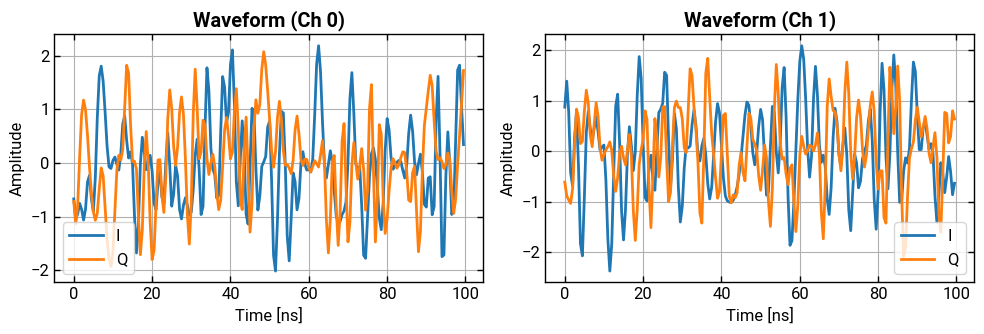

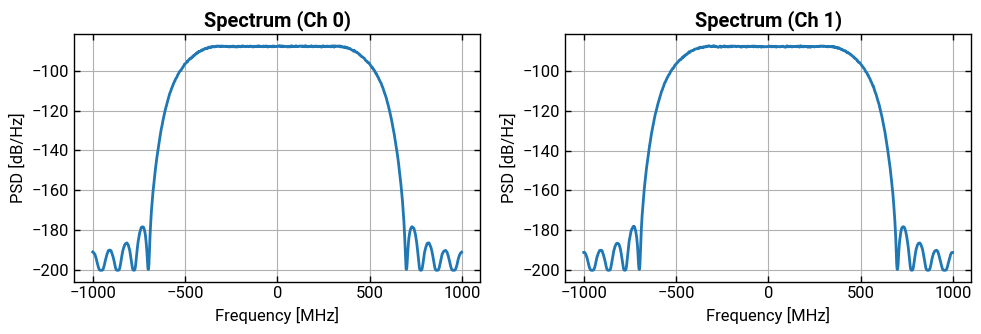

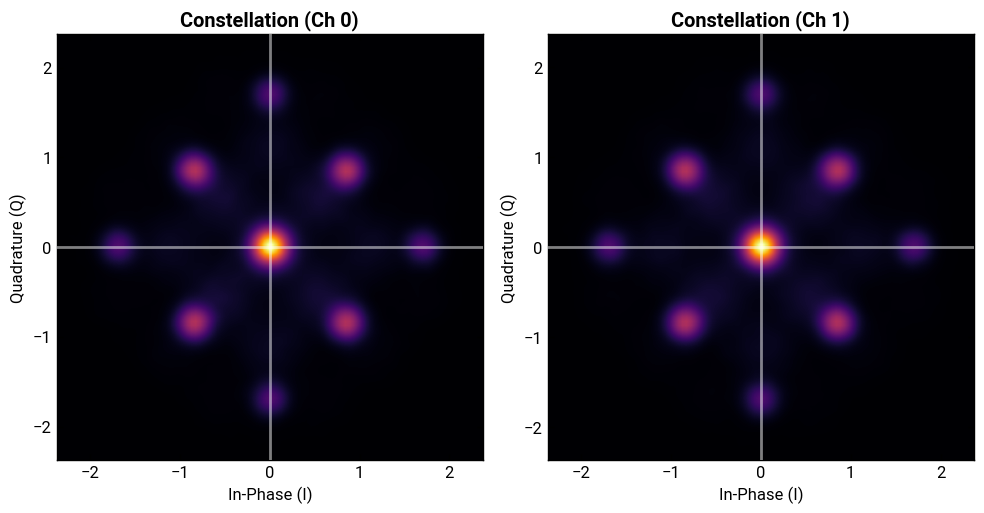

In [23]:
sig_dist.matched_filter()

sig_dist.print_info()
sig_dist.plot_symbols(num_symbols=100, show=True)
sig_dist.plot_psd(show=True, nperseg=2**10)
sig_dist.plot_constellation(show=True)


In [38]:
sig_to_eq = sig_dist.copy()

sig_to_eq.equalize(
    method="rls", num_train_symbols=2**10, block_size=1, num_taps=11, device="cpu"
)


2026-02-20 18:32:30 [INFO] [commstools/equalizers.py] RLS equalizer: num_taps=11, lambda=0.99, sps=2, block_size=1


Signal(samples=array([[-0.513566  +0.5374527j , -0.72172934+0.5479964j ,
         0.07281005+0.21989363j, ...,  0.01711941+0.8348743j ,
        -1.0062596 -0.07445107j,  1.1338257 -0.02593633j],
       [-0.4066391 -0.43737027j,  0.46031317+0.29272637j,
        -1.0128832 +0.10012055j, ..., -1.1326461 -0.0028014j ,
         0.99944514-0.10972831j,  0.05903587-1.0232131j ]],
      shape=(2, 262139), dtype=complex64), sampling_rate=1000000000.0, symbol_rate=1000000000.0, mod_scheme='PSK', mod_order=4, mod_unipolar=False, mod_rz=False, source_bits=array([[1, 0, 1, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(2, 524288), dtype=int8), source_symbols=array([[-1.8369701e-16-1.0000000e+00j, -1.8369701e-16-1.0000000e+00j,
        -1.0000000e+00+1.2246469e-16j, ...,
         1.0000000e+00+0.0000000e+00j, -1.8369701e-16-1.0000000e+00j,
        -1.8369701e-16-1.0000000e+00j],
       [ 1.0000000e+00+0.0000000e+00j,  1.0000000e+00+0.0000000e+00j,
        -1.8369701e-16-1.0000000e+00j, ...,


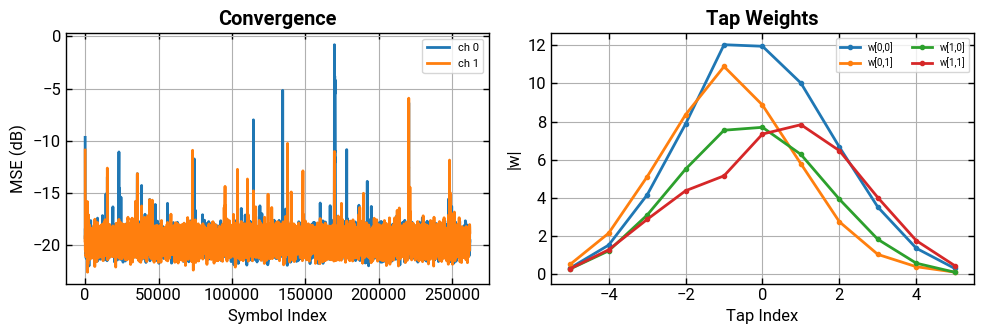

In [39]:
sig_to_eq.plot_equalizer(show=True)


,Property,Value
0,Spectral Domain,BASEBAND
1,Physical Domain,DIG
2,Modulation (Scheme/Order),PSK / 4
3,Symbol Rate,1.00 GBaud
4,Bit Rate,2.00 Gbps
5,Sampling Rate,1.00 GHz
6,Samples Per Symbol,1.00
7,Pulse Shape,RRC
8,Duration,262.14 µs
9,Center Frequency,0.00 Hz


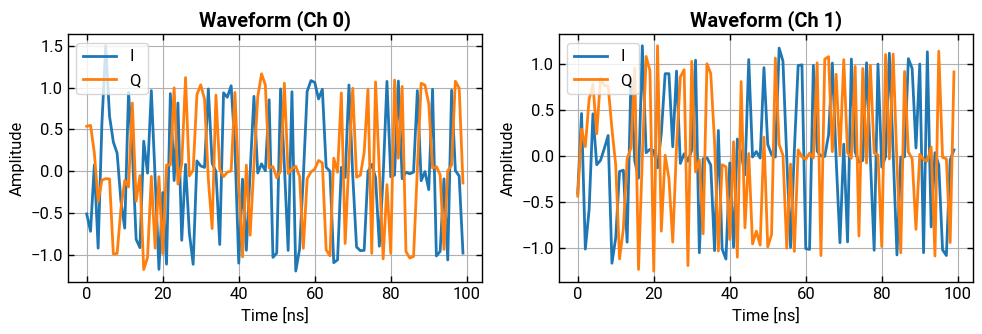

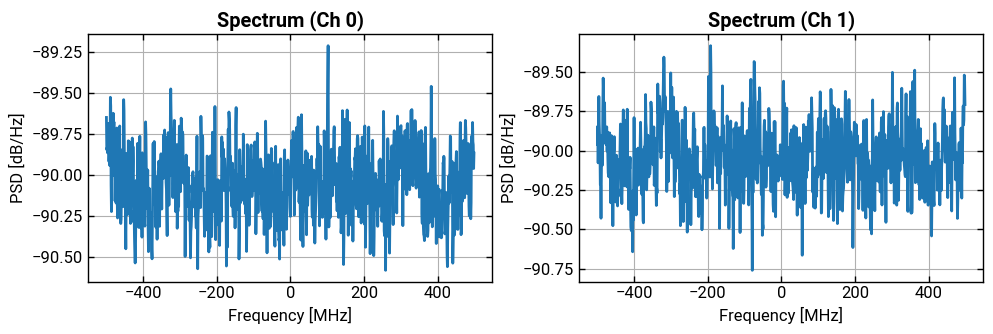

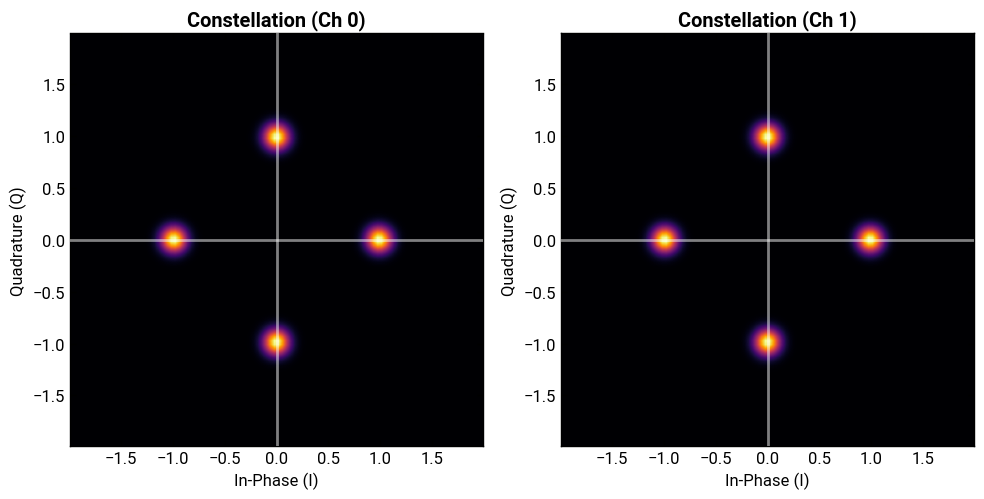

In [40]:
sig_to_eq.print_info()
sig_to_eq.plot_symbols(num_symbols=100, show=True)
sig_to_eq.plot_psd(show=True, nperseg=2**10)
sig_to_eq.plot_constellation(show=True)


In [41]:
sig_to_eq.resolve_symbols()
sig_to_eq.evm()


2026-02-20 18:32:38 [INFO] [commstools/core.py] Signal already at 1 sps, no downsampling needed.
2026-02-20 18:32:38 [INFO] [commstools/core.py] Discarding 1024 training symbols for EVM calculation.
2026-02-20 18:32:38 [INFO] [commstools/metrics.py] EVM Ch0: 141.42% (3.01 dB)
2026-02-20 18:32:38 [INFO] [commstools/metrics.py] EVM Ch1: 141.41% (3.01 dB)


(array([141.41516, 141.40894], dtype=float32),
 array([3.0099201, 3.0095367], dtype=float32))

In [11]:
sig_to_eq.resolved_symbols


array([[-0.48858204+0.53362125j, -0.72140497+0.54517376j,
         0.06085924+0.18842043j, ...,  0.01726219+0.8329849j ,
        -1.0161157 -0.07229335j,  1.1320373 -0.0311463j ],
       [-0.46876597-0.48926687j,  0.5451023 +0.36112452j,
        -1.1027145 +0.0334238j , ..., -1.1393335 +0.00683768j,
         1.0022743 -0.09259509j,  0.05032139-1.060512j  ]],
      shape=(2, 262139), dtype=complex64)

In [12]:
sig_to_eq.source_symbols


array([[-1.8369701e-16-1.0000000e+00j, -1.8369701e-16-1.0000000e+00j,
        -1.0000000e+00+1.2246469e-16j, ...,
         1.0000000e+00+0.0000000e+00j, -1.8369701e-16-1.0000000e+00j,
        -1.8369701e-16-1.0000000e+00j],
       [ 1.0000000e+00+0.0000000e+00j,  1.0000000e+00+0.0000000e+00j,
        -1.8369701e-16-1.0000000e+00j, ...,
        -1.0000000e+00+1.2246469e-16j, -1.8369701e-16-1.0000000e+00j,
         1.0000000e+00+0.0000000e+00j]],
      shape=(2, 262144), dtype=complex64)